In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# **Data Classification**

## **Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split ,StratifiedKFold, cross_val_score
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report,roc_auc_score,
roc_curve)

import warnings
warnings.filterwarnings('ignore')

## **Reading Train data**

In [3]:
Space_ship_train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")

In [4]:
Space_ship_train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [5]:
Space_ship_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
Space_ship_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
Space_ship_train.shape

(8693, 14)

## **Cleaning train data**

### Nulls

To extract if data hase any nulls:

In [8]:
Space_ship_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

For removing **Nulls** at Categorical columns by **Mode**:

In [9]:
# at categorical
categorical_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

for col in categorical_cols:
    Space_ship_train[col].fillna(Space_ship_train[col].mode()[0], inplace=True)

For removing **Nulls** at Numerical columns by **Median**:

In [10]:
#  For numerical columns
numeric_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for col in numeric_cols:
    Space_ship_train[col].fillna(Space_ship_train[col].median(), inplace=True)

We delete **Nulls** from Name column:

In [11]:
# at Name column
Space_ship_train.drop(columns=['Name'], inplace=True)

To ensure ther is **Nulls** stll found at our data:

In [12]:
Space_ship_train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

## **FeatureExtraction**

For extraction **Unique Values** at evry feature:

In [13]:
for i in Space_ship_train.columns:
    print(f'--->>{i} unique values :\n {Space_ship_train[i].unique()}')
    print('#' *70)

--->>PassengerId unique values :
 ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
######################################################################
--->>HomePlanet unique values :
 ['Europa' 'Earth' 'Mars']
######################################################################
--->>CryoSleep unique values :
 [False  True]
######################################################################
--->>Cabin unique values :
 ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
######################################################################
--->>Destination unique values :
 ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
######################################################################
--->>Age unique values :
 [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61. 50.
 41. 57. 11. 52. 51. 46. 

We make **OneHot Encoding** For **HomePlanet** column by using this code:

In [14]:
# Apply One-Hot Encoding 
Space_ship_train = pd.get_dummies(Space_ship_train, columns=['HomePlanet'], prefix='HomePlanet')

To extract important features from **Cabin** column we use this code:

In [15]:
Space_ship_train[['Deck', 'CabinNum', 'Side']] = Space_ship_train['Cabin'].str.split('/', expand=True)

#Drop Main column
Space_ship_train = Space_ship_train.drop(['Cabin'],axis=1)

To Categorial **Age** column to Catigorical ages we use this code:

In [16]:
Space_ship_train['AgeGroup'] = pd.cut(
    Space_ship_train['Age'],
    bins=[-1, 12, 18, 30, 50, 70, 100],
    labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior', 'Elder'])

To turn Features Which are Non Numerical to Numerical values by using this code:

In [17]:
# To turn VIP to Numerical column
Space_ship_train['VIP'] = Space_ship_train['VIP'].astype(int)

# To turn CrypoSleep to Numerical column
Space_ship_train['CryoSleep'] = Space_ship_train['CryoSleep'].astype(int)

# To turn Transported to Numerical column
Space_ship_train['Transported'] = Space_ship_train['Transported'].astype(int)

# To turn CabinNum to Numerical column
Space_ship_train['CabinNum'] = pd.to_numeric(Space_ship_train['CabinNum'], errors='coerce')

To extract **TotalSpend** for evry one we use this code:

In [18]:
Space_ship_train['TotalSpend'] = (Space_ship_train['RoomService'] +
Space_ship_train['FoodCourt'] +Space_ship_train['ShoppingMall'] +Space_ship_train['Spa'] +
                                  Space_ship_train['VRDeck'])

Derived Spending and Behavior Features by using this code:

In [19]:
# Spending ratio per age
Space_ship_train['Spend_per_Age'] = Space_ship_train['TotalSpend'] / (Space_ship_train['Age'] + 1)

# Whether the passenger spent any money
Space_ship_train['SpentAnything'] = (Space_ship_train['TotalSpend'] > 0).astype(int)

# Total luxury spending (Spa + VRDeck)
Space_ship_train['LuxurySpend'] = Space_ship_train['Spa'] + Space_ship_train['VRDeck']

# Ratio of RoomService cost to total spending
Space_ship_train['RoomServiceRatio'] = Space_ship_train['RoomService'] / (Space_ship_train['TotalSpend'] + 1)

# Whether the passenger is awake (not in CryoSleep)
Space_ship_train['Awake'] = 1 - Space_ship_train['CryoSleep']

To examin data if there is any **Non Numerical** Columns:

In [20]:
Space_ship_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   PassengerId        8693 non-null   object  
 1   CryoSleep          8693 non-null   int64   
 2   Destination        8693 non-null   object  
 3   Age                8693 non-null   float64 
 4   VIP                8693 non-null   int64   
 5   RoomService        8693 non-null   float64 
 6   FoodCourt          8693 non-null   float64 
 7   ShoppingMall       8693 non-null   float64 
 8   Spa                8693 non-null   float64 
 9   VRDeck             8693 non-null   float64 
 10  Transported        8693 non-null   int64   
 11  HomePlanet_Earth   8693 non-null   bool    
 12  HomePlanet_Europa  8693 non-null   bool    
 13  HomePlanet_Mars    8693 non-null   bool    
 14  Deck               8693 non-null   object  
 15  CabinNum           8693 non-null   int64   
 16  Side  

So we applying **One-Hot Encoding** to Destination, Side, Deck, and AgeGroup columns :

In [21]:
Space_ship_train = pd.get_dummies(Space_ship_train,
    columns=['Destination', 'Side', 'Deck', 'AgeGroup'],
    prefix=['Dest', 'Side', 'Deck', 'AgeGroup'])

In [22]:
Space_ship_train

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Deck_E,Deck_F,Deck_G,Deck_T,AgeGroup_Child,AgeGroup_Teen,AgeGroup_YoungAdult,AgeGroup_Adult,AgeGroup_Senior,AgeGroup_Elder
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,...,False,False,False,False,False,False,False,True,False,False
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,...,False,True,False,False,False,False,True,False,False,False
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,...,False,False,False,False,False,False,False,False,True,False
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,...,False,False,False,False,False,False,False,True,False,False
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,...,False,False,False,False,False,False,False,True,False,False
8689,9278_01,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,...,False,False,True,False,False,True,False,False,False,False
8690,9279_01,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,...,False,False,True,False,False,False,True,False,False,False
8691,9280_01,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,...,True,False,False,False,False,False,False,True,False,False


In [23]:
Space_ship_train.shape

(8693, 39)

## **Splitting data**

In [24]:
# Separate features and target
X = Space_ship_train.drop(['Transported','PassengerId'], axis=1)
y = Space_ship_train['Transported']

In [25]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## **Modeling**

We use **XGBClassifier Model** 

In [26]:
xgb = XGBClassifier(
    n_estimators=1200,
    learning_rate=0.02,
    max_depth=7,
    subsample=0.9,
    colsample_bytree=0.9,
    gamma=0.1,
    reg_lambda=4,
    reg_alpha=0.7,
    min_child_weight=2,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)



xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Accuracy: 0.81943645773433


In [27]:
# Stratified Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(xgb, X, y, cv=skf, scoring='accuracy')

print("Stratified CV Accuracy:", scores)
print("Mean Stratified CV Accuracy:", scores.mean())


Stratified CV Accuracy: [0.8200115  0.8119609  0.8079356  0.81070196 0.80149597]
Mean Stratified CV Accuracy: 0.8104211843506214


### **Model Evaluation for XGBClassifier Model**

In [28]:
# Classification Report
print("\n Classification Report:\n")
print(classification_report(y_test, y_pred_xgb))


 Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       863
           1       0.83      0.81      0.82       876

    accuracy                           0.82      1739
   macro avg       0.82      0.82      0.82      1739
weighted avg       0.82      0.82      0.82      1739



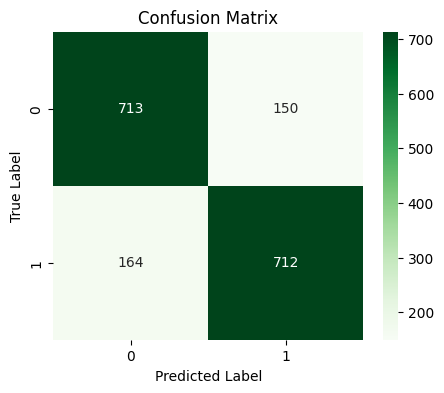

In [29]:
# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### **Visualization by ROC Curve**

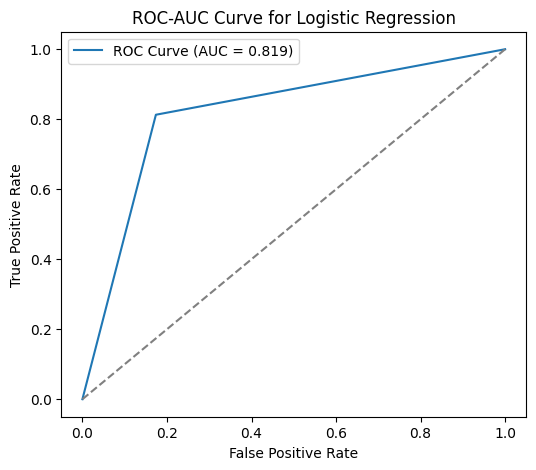

In [30]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_xgb)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_xgb):.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve for Logistic Regression")
plt.legend()
plt.show()

Visualization Important Feature at data:

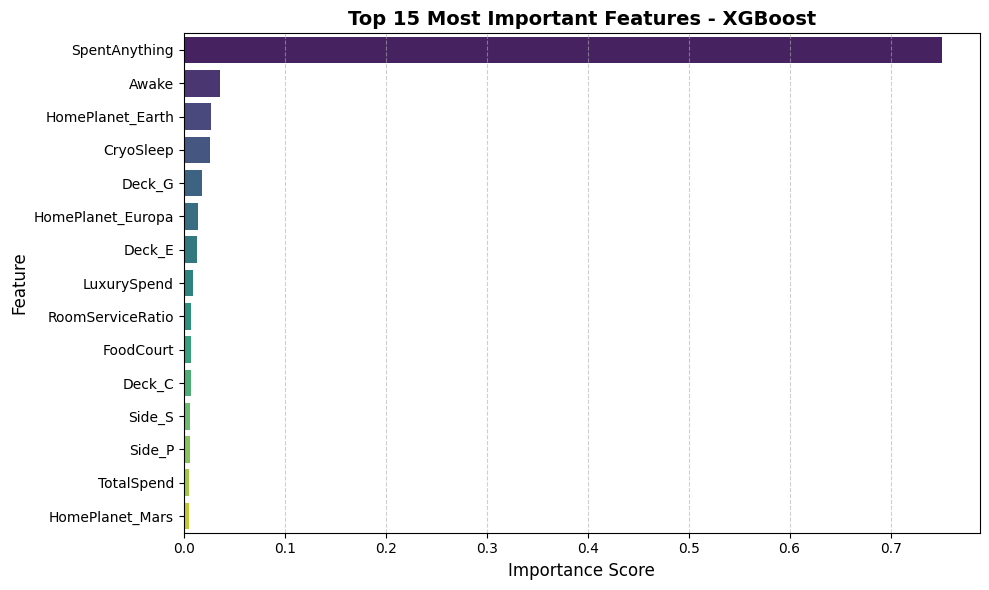

In [31]:
# extract important feature and oreder 
importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

# best 20 feature
plt.figure(figsize=(10, 6))
sns.barplot(
    x=importances.head(15),
    y=importances.head(15).index,
    palette="viridis")

plt.title("Top 15 Most Important Features - XGBoost", fontsize=14, weight='bold')
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### **Reading Test data**

In [32]:
Space_ship_test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [33]:
Space_ship_test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [34]:
Space_ship_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [35]:
Space_ship_test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [36]:
Space_ship_test.shape

(4277, 13)

### **Nulls at Test data**

To examin if found any Nulls at Test data:

In [37]:
Space_ship_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

For removing **Nulls** at Categorical columns by **Mode**:

In [38]:
# at categorical
categorical_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

for col in categorical_cols:
    Space_ship_test[col].fillna(Space_ship_test[col].mode()[0], inplace=True)

For removing **Nulls** at Numerical columns by **Median**:

In [39]:
#  For numerical columns
numeric_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for col in numeric_cols:
    Space_ship_test[col].fillna(Space_ship_test[col].median(), inplace=True)

We delete **Nulls** from Name column:

In [40]:
# at Name column
Space_ship_test.drop(columns=['Name'], inplace=True)

To ensure if still found any **Nulls** at Test data:

In [41]:
Space_ship_test.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

### **FeatureExtraction at Test data**

For extraction **Unique Values** at evry feature:

In [42]:
for i in Space_ship_test.columns:
    print(f'--->>{i} unique values :\n {Space_ship_test[i].unique()}')
    print('#' *70)

--->>PassengerId unique values :
 ['0013_01' '0018_01' '0019_01' ... '9271_01' '9273_01' '9277_01']
######################################################################
--->>HomePlanet unique values :
 ['Earth' 'Europa' 'Mars']
######################################################################
--->>CryoSleep unique values :
 [ True False]
######################################################################
--->>Cabin unique values :
 ['G/3/S' 'F/4/S' 'C/0/S' ... 'D/296/P' 'D/297/P' 'G/1498/S']
######################################################################
--->>Destination unique values :
 ['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22']
######################################################################
--->>Age unique values :
 [27. 19. 31. 38. 20. 21. 23. 24. 45. 44. 46. 29. 40. 30. 14. 66. 36. 18.
 26. 48.  6. 33.  1. 17. 34.  5. 22. 16.  7.  2.  0. 56. 39. 35.  8.  3.
  9. 25. 42. 50. 41. 32. 49. 55. 60. 47. 58. 28. 12. 52. 15. 43. 54. 70.
 37. 59. 61. 63. 53.  4. 1

We make **OneHot Encoding** For **HomePlanet** column by using this code:

In [43]:
# Apply One-Hot Encoding 
Space_ship_test = pd.get_dummies(Space_ship_test, columns=['HomePlanet'], prefix='HomePlanet')

To extract important features from **Cabin** column we use this code:

In [44]:
Space_ship_test[['Deck', 'CabinNum', 'Side']] = Space_ship_test['Cabin'].str.split('/', expand=True)

#Drop Main column
Space_ship_test = Space_ship_test.drop(['Cabin'],axis=1)

To Categorial **Age** column to Catigorical ages we use this code:

In [45]:
Space_ship_test['AgeGroup'] = pd.cut(
    Space_ship_test['Age'],
    bins=[-1, 12, 18, 30, 50, 70, 100],
    labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior', 'Elder'])

To turn Features Which are Non Numerical to Numerical values by using this code:

In [46]:
# To turn VIP to Numerical column
Space_ship_test['VIP'] = Space_ship_test['VIP'].astype(int)

# To turn CrypoSleep to Numerical column
Space_ship_test['CryoSleep'] = Space_ship_test['CryoSleep'].astype(int)

# To turn CabinNum to Numerical column
Space_ship_test['CabinNum'] = pd.to_numeric(Space_ship_test['CabinNum'], errors='coerce')

To extract **TotalSpend** for evry one we use this code:

In [47]:
Space_ship_test['TotalSpend'] = (Space_ship_test['RoomService'] +
Space_ship_test['FoodCourt'] +Space_ship_test['ShoppingMall'] +Space_ship_test['Spa'] +
                                  Space_ship_test['VRDeck'])

Derived Spending and Behavior Features by using this code:

In [48]:
# Spending ratio per age
Space_ship_test['Spend_per_Age'] = Space_ship_test['TotalSpend'] / (Space_ship_test['Age'] + 1)

# Whether the passenger spent any money
Space_ship_test['SpentAnything'] = (Space_ship_test['TotalSpend'] > 0).astype(int)

# Total luxury spending (Spa + VRDeck)
Space_ship_test['LuxurySpend'] = Space_ship_test['Spa'] + Space_ship_test['VRDeck']

# Ratio of RoomService cost to total spending
Space_ship_test['RoomServiceRatio'] = Space_ship_test['RoomService'] / (Space_ship_test['TotalSpend'] + 1)

# Whether the passenger is awake (not in CryoSleep)
Space_ship_test['Awake'] = 1 - Space_ship_test['CryoSleep']

To examin data if there is any Non Numerical Columns:

In [49]:
Space_ship_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   PassengerId        4277 non-null   object  
 1   CryoSleep          4277 non-null   int64   
 2   Destination        4277 non-null   object  
 3   Age                4277 non-null   float64 
 4   VIP                4277 non-null   int64   
 5   RoomService        4277 non-null   float64 
 6   FoodCourt          4277 non-null   float64 
 7   ShoppingMall       4277 non-null   float64 
 8   Spa                4277 non-null   float64 
 9   VRDeck             4277 non-null   float64 
 10  HomePlanet_Earth   4277 non-null   bool    
 11  HomePlanet_Europa  4277 non-null   bool    
 12  HomePlanet_Mars    4277 non-null   bool    
 13  Deck               4277 non-null   object  
 14  CabinNum           4277 non-null   int64   
 15  Side               4277 non-null   object  
 16  AgeGro

So we applying **One-Hot Encoding** to Destination, Side, Deck, and AgeGroup columns :

In [50]:
Space_ship_test = pd.get_dummies(Space_ship_test,
    columns=['Destination', 'Side', 'Deck', 'AgeGroup'],
    prefix=['Dest', 'Side', 'Deck', 'AgeGroup'])

In [51]:
Space_ship_test.head(5)

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,...,Deck_E,Deck_F,Deck_G,Deck_T,AgeGroup_Child,AgeGroup_Teen,AgeGroup_YoungAdult,AgeGroup_Adult,AgeGroup_Senior,AgeGroup_Elder
0,0013_01,1,27.0,0,0.0,0.0,0.0,0.0,0.0,True,...,False,False,True,False,False,False,True,False,False,False
1,0018_01,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,True,...,False,True,False,False,False,False,True,False,False,False
2,0019_01,1,31.0,0,0.0,0.0,0.0,0.0,0.0,False,...,False,False,False,False,False,False,False,True,False,False
3,0021_01,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,False,...,False,False,False,False,False,False,False,True,False,False
4,0023_01,0,20.0,0,10.0,0.0,635.0,0.0,0.0,True,...,False,True,False,False,False,False,True,False,False,False


## **Prediction**

In [52]:
test_Id = Space_ship_test['PassengerId'].copy()
Space_ship_test = Space_ship_test.drop(['PassengerId'],axis=1)

In [53]:
predictions = xgb.predict(Space_ship_test)

## **Submission**

In [54]:
submission = pd.DataFrame({
    'PassengerId': test_Id,
    'Transported': predictions.astype(bool)
})

In [55]:
submission.head(5)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [56]:
submission.to_csv("submission.csv", index=False)